# Finding MAPE score for the first window of all four datasets for DeepAR

## imports

In [29]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [30]:
from src.RQ1_forecast import *

In [61]:
def add_mean(forcast_list_val):
    for forcast_list_el in forcast_list_val:
        forcast_list_el['mean'] = forcast_list_el.loc[:, 'sample0':f'sample{num_samples-1}'].mean(axis=1)

        
def mape_score(target, forecast):
    denominator = np.abs(target)
    flag = denominator == 0
    mape = np.mean(np.abs((target - forecast) * (1 - flag)) / (denominator + flag) )
    return mape

def calc_mape_horizon(forcast_list_val, horizon_lim, rep_no_val):
    mape_horizon_arr = np.zeros(horizon_lim)
    for horizon_no in range(horizon_lim):
        label_val = [i for i in range(horizon_no, forcast_list_val[rep_no_val].shape[0], horizon_lim)]
        target = forcast_list_val[rep_no_val].iloc[label_val]['target']
        mean = forcast_list_val[rep_no_val].iloc[label_val]['mean']
        mape_horizon_arr[horizon_no] = mape_score(target.to_numpy(), mean.to_numpy())
    return mape_horizon_arr

def mape_all(forcast_list_val, horizon_lim):
    mape_experiment_horizon = np.zeros((len(forcast_list_val), horizon_lim))
    for rep_no_val in range(len(forcast_list_val)):
        mape_experiment_horizon[rep_no_val] = calc_mape_horizon(
            forcast_list_val=forcast_list_val,
            horizon_lim=horizon_lim,
            rep_no_val=rep_no_val)
    return mape_experiment_horizon

In [67]:
model_name = 'ar'
with open(f'/home/dev/deepts/configs/ks_config_{model_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)


# Electricity

In [33]:
model_name = config['model_name']
dataset_name = "electricity" 
if config[dataset_name] is not None:
    forcast_list1 = read_csv_result('forecasts.csv', config[dataset_name])



101it [00:00, 32027.27it/s]
100%|###########| 100/100 [04:48<00:00,  2.88s/it]


In [34]:
add_mean(forcast_list1)
mape_experiment_elec = mape_all(forcast_list1, horizon_lim=24)

In [35]:
mape_experiment_elec[0]

array([0.06774319, 0.06681378, 0.07072433, 0.08338735, 0.1124733 ,
       0.10518415, 0.09785674, 0.08071207, 0.07718154, 0.07818818,
       0.09766779, 0.09349926, 0.10201327, 0.1021843 , 0.10762183,
       0.12115877, 0.11463061, 0.10810721, 0.14813861, 0.10893781,
       0.11057751, 0.1089573 , 0.11327429, 0.10945697])

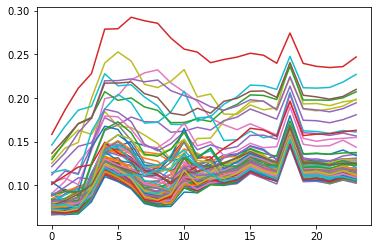

In [55]:
plt.plot(mape_experiment_elec.T)
plt.show()

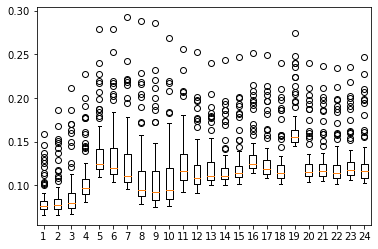

In [47]:
plt.boxplot(mape_experiment_elec)
plt.show()

# Solar_nips

In [37]:
dataset_name = 'solar_nips'
if config[dataset_name] is not None:
    forcast_list_solar = read_csv_result('forecasts.csv', config[dataset_name])



201it [00:00, 43266.88it/s]
100%|###########| 100/100 [02:08<00:00,  1.28s/it]


In [38]:
add_mean(forcast_list_solar)
mape_experiment_solar = mape_all(forcast_list_solar, horizon_lim=24)

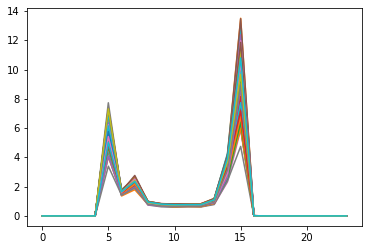

In [53]:
plt.plot(mape_experiment_solar.T)
plt.show()

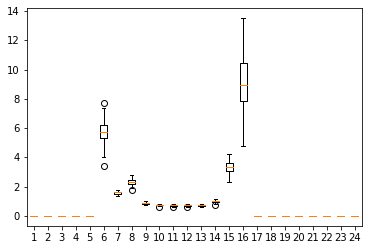

In [49]:
plt.boxplot(mape_experiment_solar)
plt.show()

# Exchange rate

In [62]:
dataset_name = "exchange_rate"
if config[dataset_name] is not None:
    forcast_list_exc = read_csv_result('forecasts.csv', config[dataset_name])

201it [00:00, 44514.24it/s]
100%|###########| 100/100 [00:02<00:00, 49.33it/s]


In [63]:
add_mean(forcast_list_exc)
mape_experiment_exc = mape_all(forcast_list_exc, horizon_lim=30)


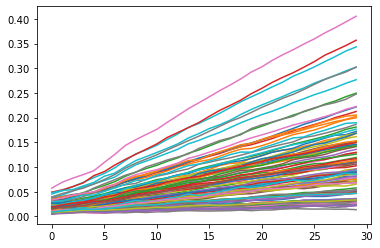

In [64]:
plt.plot(mape_experiment_exc.T)
plt.show()

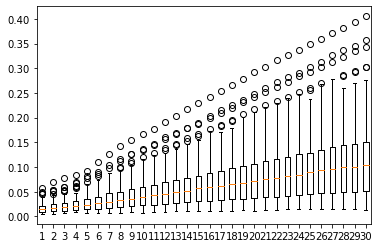

In [65]:
plt.boxplot(mape_experiment_exc)
plt.show()

# Traffic_nips

In [68]:
dataset_name = 'traffic_nips'
if config[dataset_name] is not None:
    forcast_list_traf = read_csv_result('forecasts.csv', config[dataset_name])

101it [00:00, 24612.17it/s]
100%|###########| 100/100 [18:00<00:00, 10.81s/it]


In [72]:
add_mean(forcast_list_traf)
mape_experiment_traf = mape_all(forcast_list_traf, horizon_lim=24)

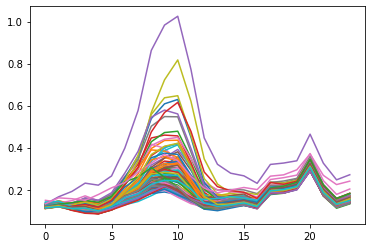

In [73]:
plt.plot(mape_experiment_traf.T)
plt.show()

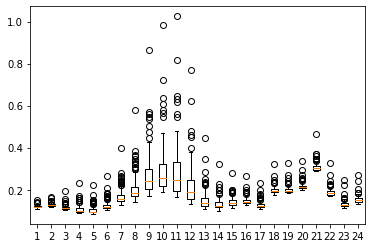

In [74]:
plt.boxplot(mape_experiment_traf)
plt.show()